# Analyzing customer purchasing behavior using association rule mining for retail optimization  

# Task

Tell me about this dataset.

Here is all the data you need: "OnlineRetail(1).xlsx"

# Data Loading

Subtasks:

Load the CSV dataset

Inspect the first few rows

View basic metadata (columns, datatypes)

Reasoning:
Understanding the structure of the dataset is the first step. This helps identify necessary cleaning steps and determine which columns are relevant to customer behavior analysis.



# INSTALLING LIBRARIES :

In [ ]:
pip install pandas
pip install matplotlib
pip install seaborn
pip install mlxtend
pip install networkx
pip install openpyxl
pip install scikit-learn

#IMPORT STATEMENTS :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules


# UPLOAD FILE :

In [ ]:
# Upload your file first in Google Colab:
from google.colab import files
uploaded = files.upload()

Reasoning: Load the excel file into a pandas DataFrame and display the first few rows.

# DATA LOADING

Subtasks:

Load the CSV dataset

Inspect the first few rows

View basic metadata (columns, datatypes)

Reasoning:
Understanding the structure of the dataset is the first step. This helps identify necessary cleaning steps and determine which columns are relevant to customer behavior analysis.



In [ ]:

# Load and preview the dataset
import pandas as pd

df = pd.read_csv("OnlineRetail (1).csv", encoding='ISO-8859-1')
df.head()


Saving OnlineRetail (1).csv to OnlineRetail (1) (1).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# DATA EXPLORATION

Subtasks:

Check shape of data

Find missing values

Explore unique countries

Check top-purchased products

Reasoning:
Initial exploration helps in understanding the volume, variety, and potential quality issues in the dataset. This guides decisions in the cleaning and filtering phases.

In [ ]:
# Basic information
print("Shape of Dataset:", df.shape)
print("\nColumn Info:")
print(df.info())

# Null values
print("\nMissing Values:")
print(df.isnull().sum())

# Unique countries
print("\nUnique Countries:")
print(df['Country'].unique())

# Top 5 most common products
print("\nTop 5 Products:")
print(df['Description'].value_counts().head())


Shape of Dataset: (397924, 8)

Column Info:
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None

Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Unique Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE'

# DATA CLEANING AND ANALYSIS

Subtasks:

Remove rows with missing Description or CustomerID

Remove canceled transactions (InvoiceNo starting with "C")

Filter out negative quantities

Convert date columns to datetime format

Filter by a target country (e.g., United Kingdom)

Reasoning:
Cleaning ensures that the dataset only contains valid, meaningful transactions. This improves the quality of the analysis and avoids misleading patterns.



In [ ]:
# Clean the data
df = df.dropna(subset=['Description', 'CustomerID'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter by country
df_uk = df[df['Country'] == 'United Kingdom']

# Create basket
basket = df_uk.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter strong rules
strong_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 3)]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


<ipython-input-4-a67928328073>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027269,0.657971,14.451925
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.027269,0.598945,14.451925
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.027509,0.730463,16.390122
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.027509,0.617251,16.390122
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024266,0.819473,22.293137
...,...,...,...,...,...
71,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.020482,0.716387,24.192941
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.020482,0.844059,20.726763
73,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.020482,0.502950,20.726763
74,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.020482,0.691684,24.192941


# DATA VISUALIZATION

Subtasks:

Item Frequency Plot: Top-selling products

Sales Trend: Monthly and hourly sales analysis

Customer Order Distribution: Orders per customer

Support vs Confidence Scatter Plot

Lift Distribution Plot

Association Rules Network Graph

Item Co-occurrence Heatmap

Lift Heatmap Between Rules

Reasoning:
Visualizations turn complex patterns into understandable insights for stakeholders. They help identify trends, clusters, and correlations in customer behavior.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


# Support vs Confidence

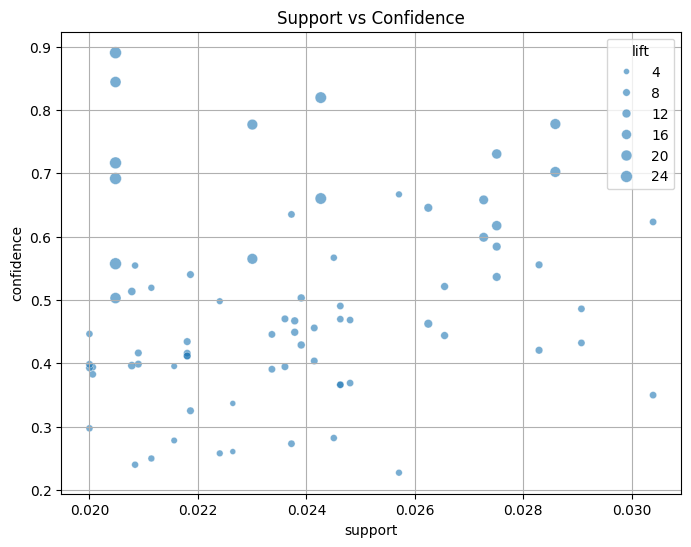

In [ ]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.6)
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()


# Lift Distribution

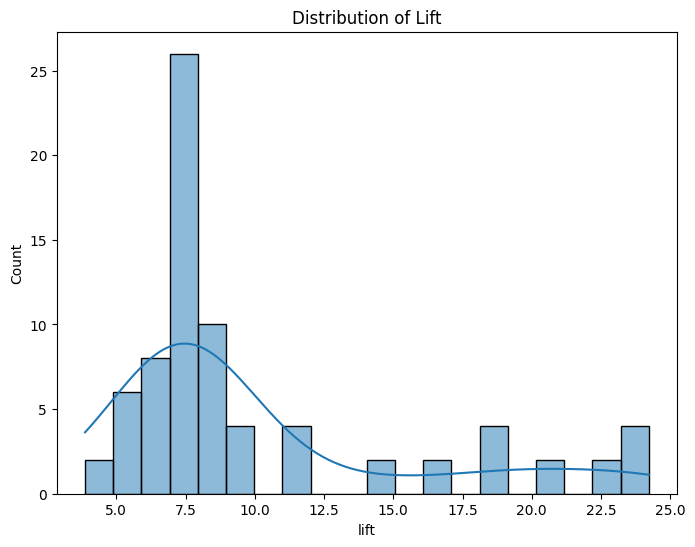

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title("Distribution of Lift")
plt.show()


# Top 10 Items

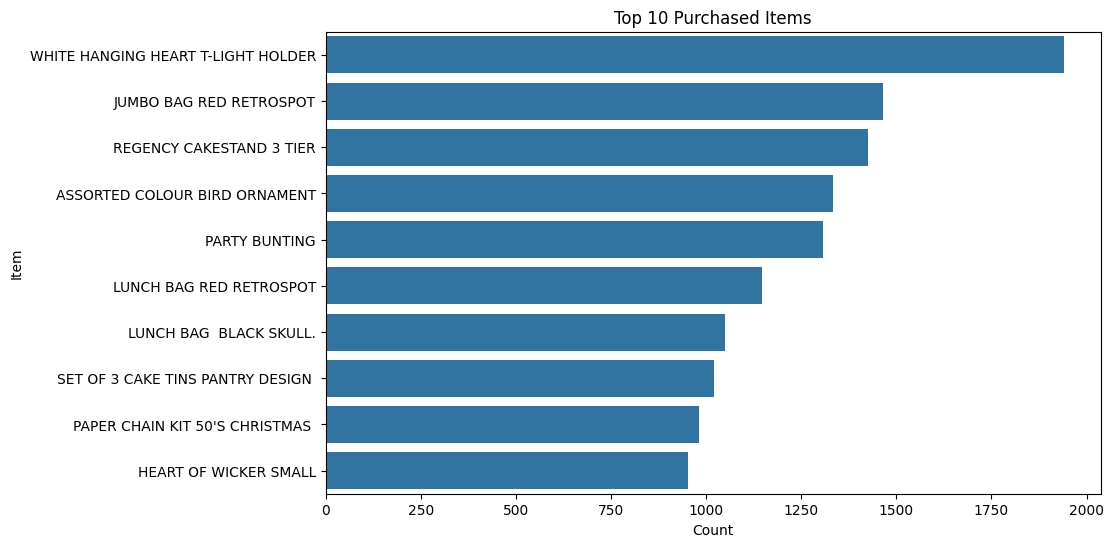

In [ ]:

top_items = df_uk['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Purchased Items")
plt.xlabel("Count")
plt.ylabel("Item")
plt.show()

# Association Rules Network

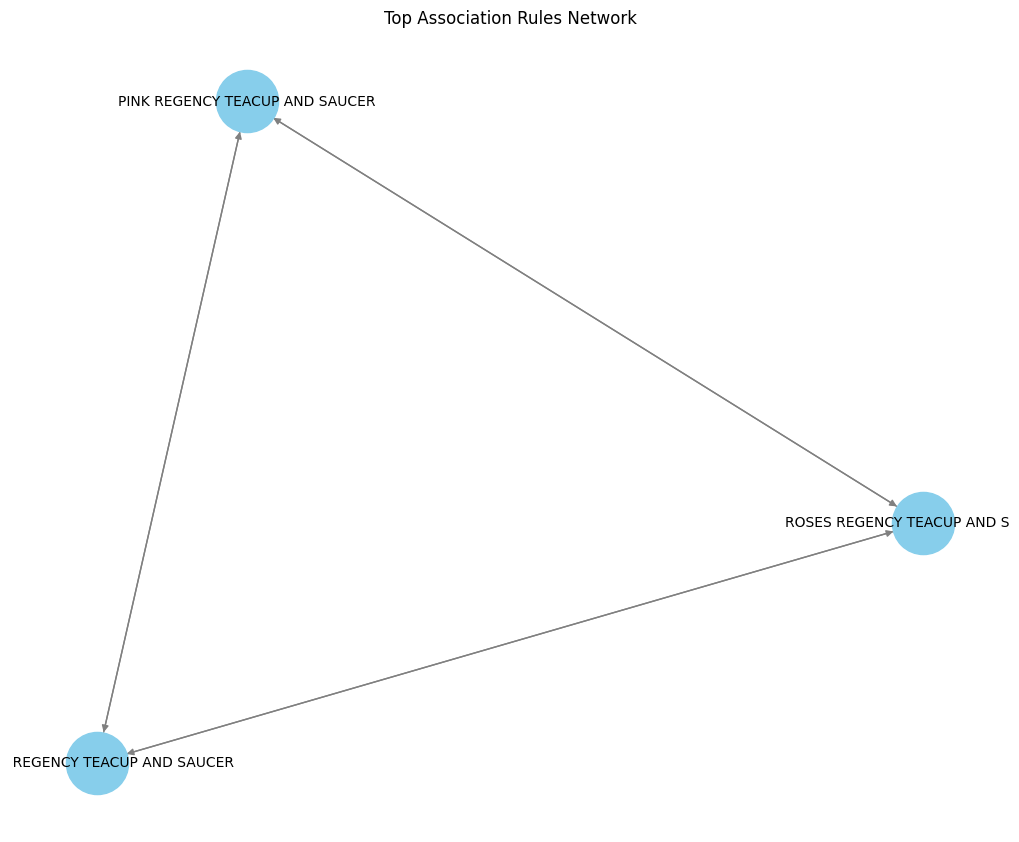

In [ ]:

top_rules = rules.sort_values('lift', ascending=False).head(10)
G = nx.DiGraph()
for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(str(a), str(c), weight=row['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
plt.title("Top Association Rules Network")
plt.show()


 # Customer Purchase Distribution

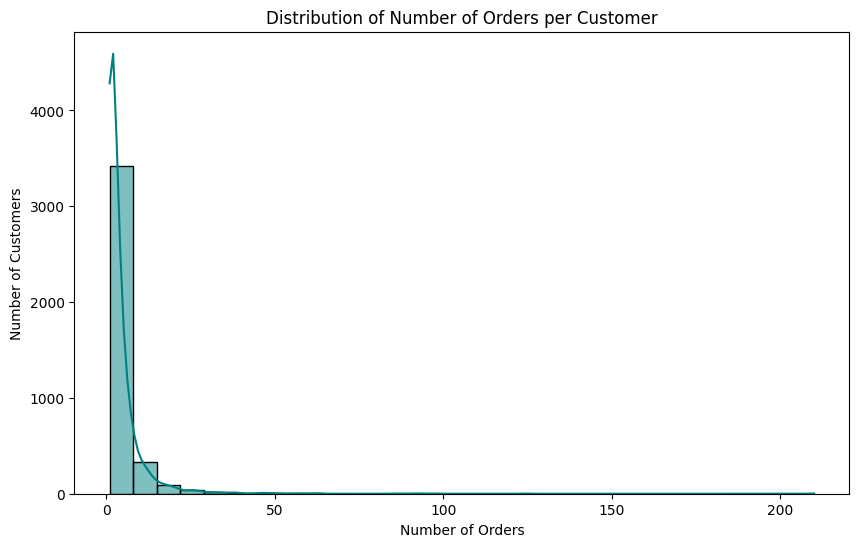

In [ ]:
cust_order_count = df_uk.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(cust_order_count, bins=30, kde=True, color='teal')
plt.title("Distribution of Number of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


# Heatmap of Item Co-occurrence

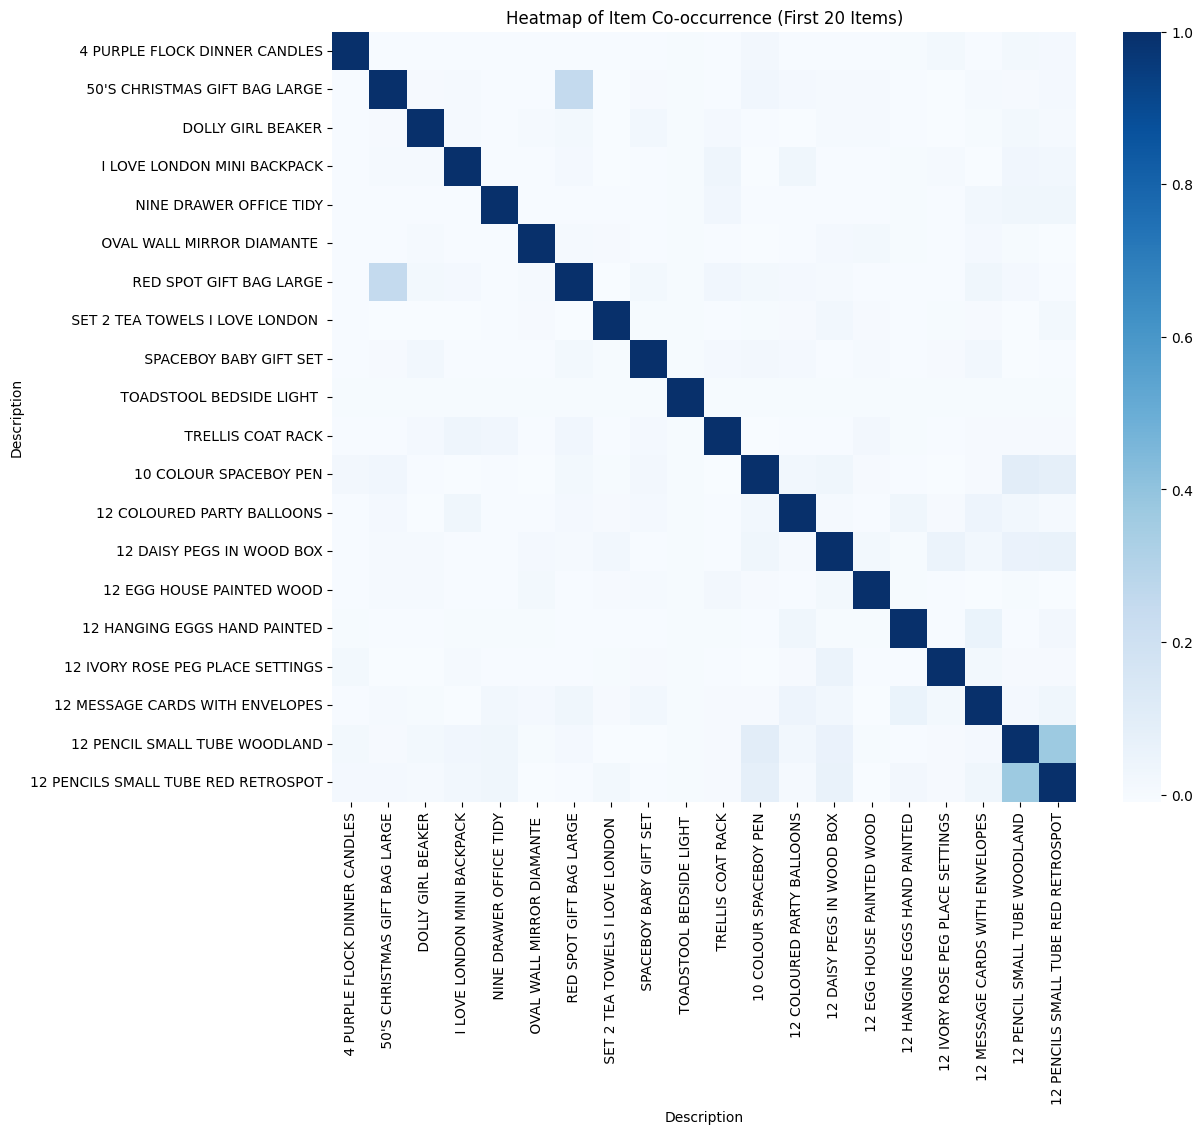

In [ ]:
basket_small = basket.iloc[:, :20]  # Use first 20 items for readability
corr_matrix = basket_small.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='Blues', annot=False)
plt.title("Heatmap of Item Co-occurrence (First 20 Items)")
plt.show()


# Time of Day Sales Trend

<ipython-input-16-3d1d36f0f190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Hour'] = df_uk['InvoiceDate'].dt.hour


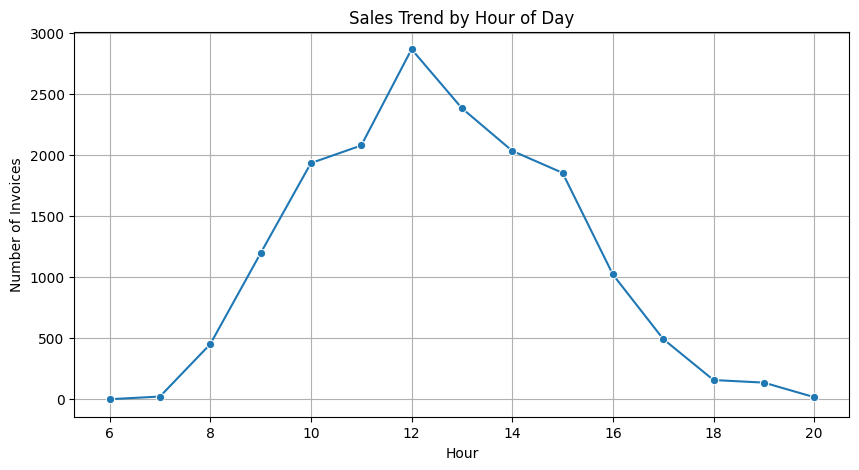

In [ ]:
df_uk['Hour'] = df_uk['InvoiceDate'].dt.hour
hourly_sales = df_uk.groupby('Hour')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title("Sales Trend by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Invoices")
plt.grid(True)
plt.show()
